In [381]:
# Important all the relevant modules & packages

import pandas as pd
import numpy as np

# One hot encoder from Scikit - learn
from sklearn.preprocessing import OneHotEncoder


# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
#from sklearn.metrics import f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from subprocess import call

In [382]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [383]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [384]:
# Working out the median age of the passengers and filling in the missing values with the median age.
titanic_df["Age"].fillna(titanic_df[["Age"]].median().values[0],inplace=True)

C:\Users\helde\AppData\Local\Temp\ipykernel_14748\3477558239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Age"].fillna(titanic_df[["Age"]].median().values[0],inplace=True)


In [385]:
# Replaced the NA values in age with the median age of 28
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [386]:
# Features variables: Pclass, Sex, Age, Fare

# Target Variable: Survived

# Features not deemed relevant: Ticket, Cabin, Name, PassengerId

# Uknown features, so will not be used in the analysis: SibSp, Parch, Embarked

In [387]:
# You can also drop whichever other columns you'd like here
titanic_df.drop(["PassengerId","Name","Cabin","Ticket","SibSp","Parch"], axis=1, inplace=True)

In [388]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [389]:
# Wec can see there are 2 missing values in "Embarked"
# We will therefore determine the unique values and drop the na values
titanic_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [390]:
# Dropping the NA values and making sure the effect is applied to the original dataframe
titanic_df.dropna(inplace=True)

In [391]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.6+ KB


In [392]:
# We can see there are now 889 values across all the columns.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.6+ KB


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [393]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [394]:
# titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
# titanic_df.head()

categorical_columns = titanic_df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(titanic_df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([titanic_df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded.dropna(inplace=True)


In [395]:
df_encoded

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0.0,3.0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,0.0,3.0,25.0,7.0500,0.0,1.0,0.0,0.0,1.0
885,0.0,3.0,39.0,29.1250,1.0,0.0,0.0,0.0,1.0
886,0.0,2.0,27.0,13.0000,1.0,0.0,0.0,0.0,1.0
887,1.0,1.0,19.0,30.0000,0.0,1.0,1.0,0.0,0.0


## Setting up and training a Decision Tree Model

In [396]:
# Features and target variables
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']
X.shape

(887, 8)

In [397]:
X

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
884,3.0,25.0,7.0500,0.0,1.0,0.0,0.0,1.0
885,3.0,39.0,29.1250,1.0,0.0,0.0,0.0,1.0
886,2.0,27.0,13.0000,1.0,0.0,0.0,0.0,1.0
887,1.0,19.0,30.0000,0.0,1.0,1.0,0.0,0.0


In [398]:
# Splitting the original dataset into training and tests sets
X_train_full, X_test, y_train_full, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Splitting the training set further into training and development sets
X_train, X_dev, y_train, y_dev=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)



In [399]:
# #random state
# r = 42 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r) # 70% training and 30% test

In [400]:
# Create Decision Tree classifer object
# training a model without pruning
unpruned = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
unpruned.fit(X_dev,y_dev)

#Predict the response for development dataset:
y_dev_pred = unpruned.predict(X_dev)
# y_test_pred = unpruned.predict(X_test)

#Model Accuracy and Confusion Matrix, how often is the classifier correct
# print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
# print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print(f'Development Accuracy without pruning: {accuracy_score(y_dev, y_dev_pred)}')
print("At depth:", unpruned.tree_.max_depth)
# print("Performance without pruning:", unpruned.score(X_test, y_test))

Development Accuracy without pruning: 0.9929577464788732
At depth: 11


## Plotting Development Set Confusion Matrix

Development Accuracy: 0.9929577464788732


Text(0.5, 1.0, 'Development Confusion Matrix')

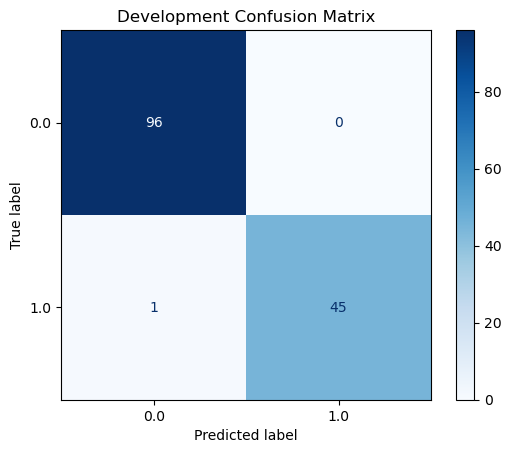

In [401]:
# Model Accuracy and Confusion Matrix, how often is the classifier correct
# print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Development Accuracy: {accuracy_score(y_dev, y_dev_pred)}')

# cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
# disp.plot(cmap='Blues')
# plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_dev, y_dev_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Development Confusion Matrix')

Best performance reached at depth of: 3 



c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\helde\.conda\envs\Data_Science\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


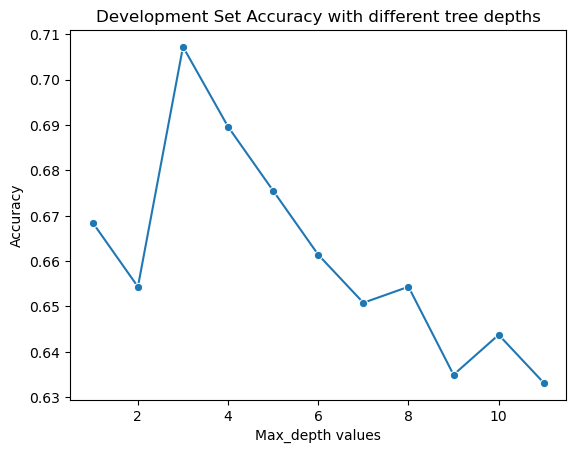

In [402]:
# looking at effect of max_depth pruning on the development set  
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = [] 
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=1)
  clf.fit(X_dev, y_dev)
  score = clf.score(X_train, y_train)
  pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title("Development Set Accuracy with different tree depths")

best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth,"\n")

We can see that the best performance is between 2-4 depths. After the peak, the accuracy reduces with the increased number of tree depths.

## Pruned Tree Performance:

In [403]:
# fitting the chosen tree with the best depth
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

#pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=42,min_samples_leaf=2)

# Train Decision Tree Classifer
pruned.fit(X_train,y_train)

#Predict the response for training & test dataset
y_train_pred = pruned.predict(X_train)
y_test_pred = pruned.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Development Accuracy:",accuracy_score(y_dev, y_dev_pred))
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_test, y_test_pred))

Best performance reached at depth of: 3
Development Accuracy: 0.9929577464788732
Training Accuracy: 0.7072310405643739
Testing Accuracy: 0.6404494382022472


Development Accuracy: 0.9929577464788732
Training Accuracy: 0.7072310405643739
The final model on the test data has an accuracy of: 0.6404494382022472


Text(0.5, 1.0, 'Test Confusion Matrix')

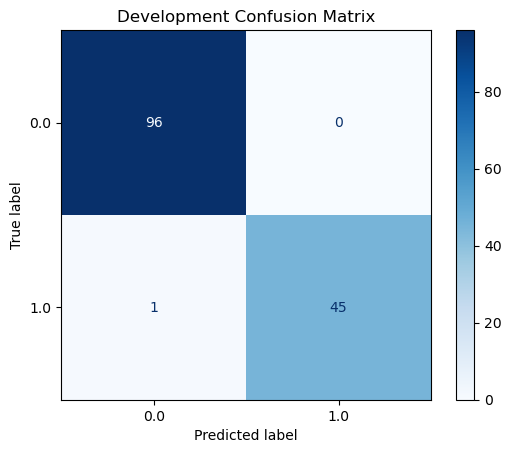

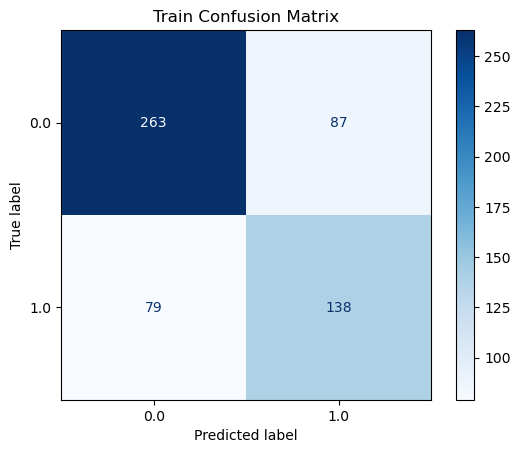

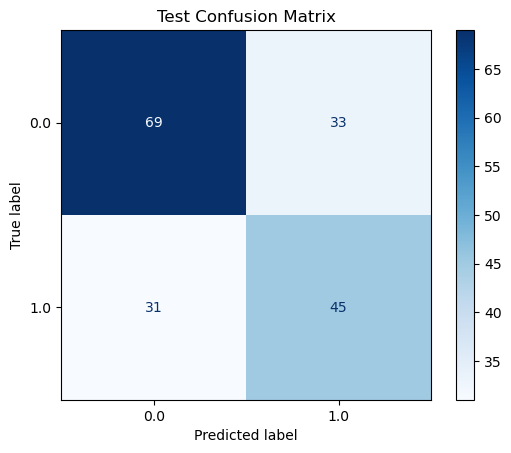

In [404]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
print(f'Development Accuracy: {accuracy_score(y_dev, y_dev_pred)}')
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'The final model on the test data has an accuracy of: {accuracy_score(y_test, y_test_pred)}')

cm = confusion_matrix(y_dev, y_dev_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Development Confusion Matrix')

cm = confusion_matrix(y_train, y_train_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=unpruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unpruned.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')